--- Image and Mask Details ---
Loaded Image: wh1277.jpg
Image size: (256, 256), Image mode: RGB
Mask size: (256, 256), Mask mode: P


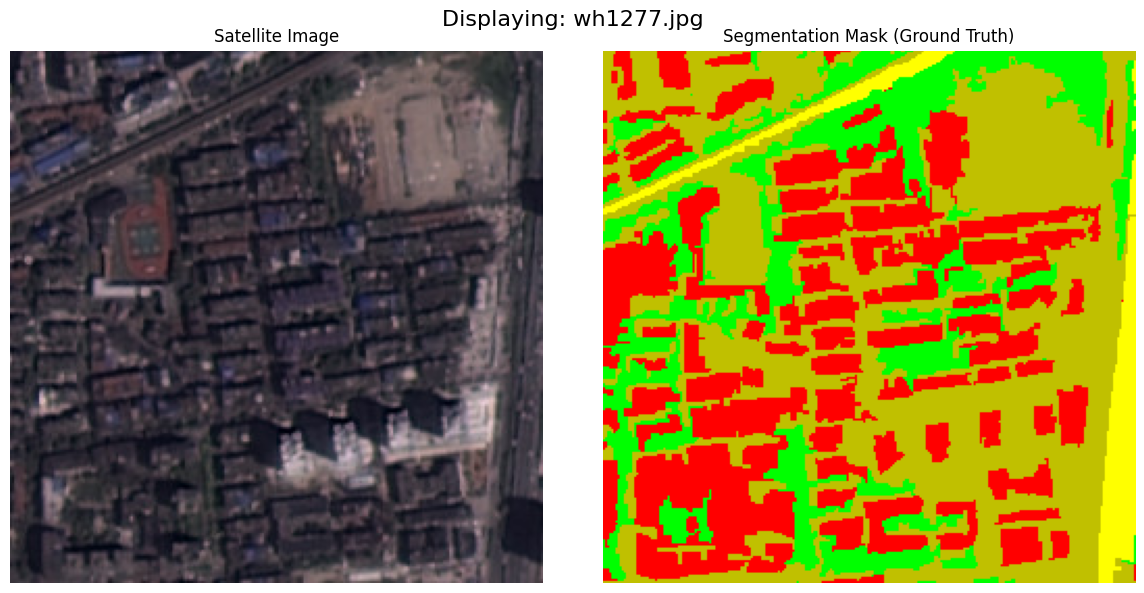

In [6]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# --- Define Paths ---
# Define the base directory for the dataset
data_dir = os.path.join('..', 'data', 'WHDLD')
# Define paths to the image and mask folders
image_dir = os.path.join(data_dir, 'JPEGImages')
mask_dir = os.path.join(data_dir, 'SegmentationClass')

# --- Load a Random Image and Mask ---
# Get a list of all image file names
all_images = os.listdir(image_dir)
# Select one random image from the list
random_image_name = random.choice(all_images)
# Construct the full path for the image and its corresponding mask
image_path = os.path.join(image_dir, random_image_name)
# Masks have the same name but are .png files
mask_name = random_image_name.replace('.jpg', '.png')
mask_path = os.path.join(mask_dir, mask_name)

# --- Open and Display the Images ---
# Use Pillow to open the image and mask files
try:
    image = Image.open(image_path)
    mask = Image.open(mask_path)

    print("--- Image and Mask Details ---")
    print(f"Loaded Image: {random_image_name}")
    print(f"Image size: {image.size}, Image mode: {image.mode}") # e.g., (256, 256), 'RGB'
    print(f"Mask size: {mask.size}, Mask mode: {mask.mode}")     # e.g., (256, 256), 'P' (Paletted)

    # --- Create a plot to visualize the image and mask side-by-side ---
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Display the satellite image on the left plot
    ax[0].imshow(image)
    ax[0].set_title('Satellite Image')
    ax[0].axis('off') # Hide the axes

    # Display the segmentation mask on the right plot
    ax[1].imshow(mask)
    ax[1].set_title('Segmentation Mask (Ground Truth)')
    ax[1].axis('off') # Hide the axes

    plt.suptitle(f'Displaying: {random_image_name}', fontsize=16)
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: Could not find the image or mask.")
    print(f"Attempted image path: {image_path}")
    print(f"Attempted mask path: {mask_path}")
    print("\nPlease ensure the WHDLD dataset is in the 'data/WHDLD' directory and contains 'JPEGImages' and 'SegmentationClass' folders.")

In [7]:
# --- Analyze the pixel values in the mask ---
# Convert the mask (which is a Pillow Image object) into a NumPy array
mask_array = np.array(mask)
unique_values = np.unique(mask_array)

print("--- Mask Analysis ---")
print(f"Unique pixel values in this mask: {unique_values}")

# The WHDLD dataset documentation states the following class mapping:
# 0: Bare Land
# 1: Building
# 2: Sidewalk
# 3: Water
# 4: Vegetation
# 5: Road
class_mapping = {
    0: "Bare Land",
    1: "Building",
    2: "Sidewalk",
    3: "Water",
    4: "Vegetation",
    5: "Road"
}

print("\n--- Overall Class Distribution (from a sample of 100 images) ---")
# Initialize a dictionary to store the count of pixels for each class
class_pixel_counts = {k: 0 for k in class_mapping.keys()}
total_pixels = 0

# Get a random sample of 100 image names to analyze
sample_image_names = random.sample(all_images, 100)

for image_name in sample_image_names:
    # Construct the full path for the mask
    mask_name = image_name.replace('.jpg', '.png')
    mask_path = os.path.join(mask_dir, mask_name)
    
    # Open the mask and convert it to a NumPy array
    current_mask = Image.open(mask_path)
    current_mask_array = np.array(current_mask)
    
    # Count the unique values and add them to our main counter
    unique, counts = np.unique(current_mask_array, return_counts=True)
    for value, count in zip(unique, counts):
        if value in class_pixel_counts:
            class_pixel_counts[value] += count
    
    total_pixels += current_mask_array.size

# --- Print the results in a readable table ---
print("Pixel Count | Percentage | Class Name")
print("-----------------------------------------")
for class_id, pixel_count in sorted(class_pixel_counts.items()):
    percentage = (pixel_count / total_pixels) * 100
    class_name = class_mapping[class_id]
    print(f"{pixel_count:<11d} | {percentage:^10.2f}% | {class_name}")

--- Mask Analysis ---
Unique pixel values in this mask: [1 2 3 4]

--- Overall Class Distribution (from a sample of 100 images) ---
Pixel Count | Percentage | Class Name
-----------------------------------------
128753      |    1.96   % | Bare Land
959737      |   14.64   % | Building
278687      |    4.25   % | Sidewalk
853150      |   13.02   % | Water
2972205     |   45.35   % | Vegetation
197642      |    3.02   % | Road
